In [285]:
from netCDF4 import Dataset
import cartopy.crs as ccrs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.decomposition import PCA, FastICA
import pandas as pd

In [65]:
def plot_maps(temperature, lon, lat):
    fig, axes = plt.subplots(1, len(temperature), figsize=(15, 5), subplot_kw={'projection': ccrs.PlateCarree()})
    for kk in range(len(temperature)):
        axes[kk].set_global()
        axes[kk].coastlines()
        axes[kk].contourf(lon, lat, temperature[kk],transform=ccrs.PlateCarree(), cmap='coolwarm')  # didn't use transform, but looks ok...
    
    return fig, axes

# EDA

In [10]:
VUL =  Dataset('data/Volc_Forc_AOD_1st_mill.nc', 'r')['AOD'][:, 0, 0]
SUN =  Dataset('data/Solar_forcing_1st_mill.nc', 'r')['TSI'][:, 0, 0]

# unpacking variables
R1 =  Dataset('data/T2m_R1_ym_1stMill.nc', 'r')
temperature = R1.variables['T2m'][:]
lat = R1.variables['lat'][:]
lon = R1.variables['lon'][:]

## Target Data

Text(0.5, 1.0, 'Volcanic activity')

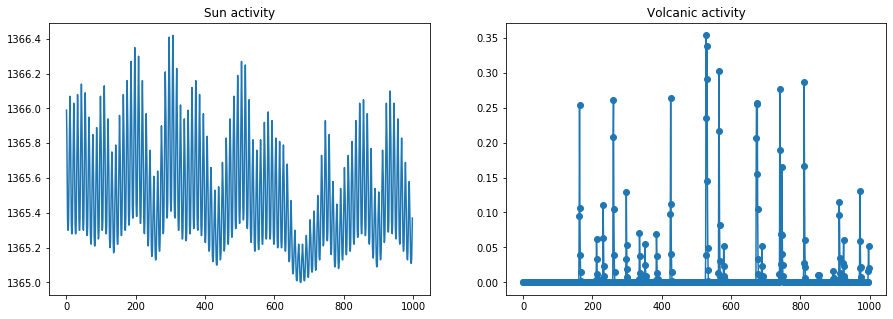

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].plot(SUN)
axes[0].set_title('Sun activity')
axes[1].plot(VUL, '-o')
axes[1].set_title('Volcanic activity')

## Temperature Data

In [93]:
correlation_mat = np.zeros( (lat.shape[0], lon.shape[0], 2))
for ii in range(lat.shape[0]):
    for jj in range(lon.shape[0]):
        correlation_mat[ii, jj, 0] = pearsonr(temperature[:, ii, jj], SUN)[0]
        correlation_mat[ii, jj, 1] = pearsonr(temperature[:, ii, jj], VUL)[0]
    
plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.heatmap(correlation_mat[:, :, 0], cmap='coolwarm', center=0)
plt.title('Correlation with Sun')
plt.subplot(122)
sns.heatmap(correlation_mat[:, :, 1], cmap='coolwarm', center=0)
plt.title('Correlation with Vol')
#plt.savefig('data/pearson_correlation.png')

Text(0.5, 1, 'Correlation with Vol')

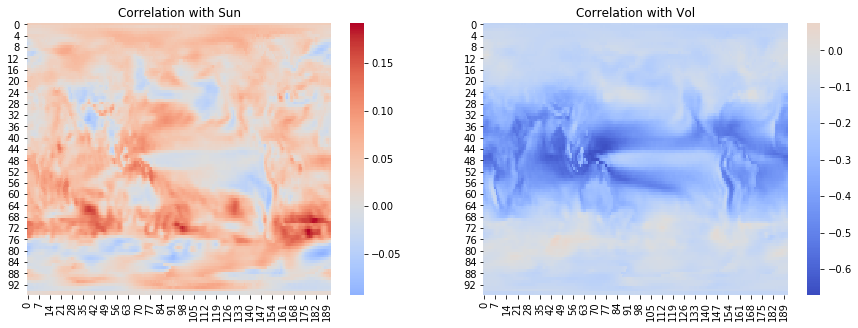

In [94]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.heatmap(correlation_mat[:, :, 0], cmap='coolwarm', center=0)
plt.title('Correlation with Sun')
plt.subplot(122)
sns.heatmap(correlation_mat[:, :, 1], cmap='coolwarm', center=0)
plt.title('Correlation with Vol')
#plt.savefig('data/pearson_correlation.png')

In [188]:
NT_tropic_inx = np.where((lat <= 30) & (lat >= 0))[0]
NT_middle_inx = np.where((lat <= 60) & (lat >= 30))[0]
NT_polar_inx = np.where((lat <= 90) & (lat >= 60))[0]

ST_tropic_inx = np.where((lat >= -30) & (lat <= 0))[0]
ST_middle_inx = np.where((lat >= -60) & (lat <= -30))[0]
ST_polar_inx = np.where((lat >= -90) & (lat <= -60))[0]

# Indices
zones = [ST_polar_inx, ST_middle_inx, ST_tropic_inx, NT_tropic_inx, NT_middle_inx, NT_polar_inx][::-1]

In [277]:
lat_sep = 16
zone_array = np.zeros((999, len(zones), lat_sep))
labels = np.empty((len(zones), lat_sep), dtype='<U5')
z_name = ['N_pol', 'N_mid', 'N_tr', 'S_tr', 'S_mid', 'S_pol']

for n, ii in enumerate(zones):
    for jj in range(lat_sep):
        zone_array[:, n, jj] = np.mean(np.mean(temperature[:, ii, 12 * jj : 12 * (jj + 1)], 1), 1)
        labels[n, jj] = f'{z_name[n]}_{jj}' #{np.mean(lon[12 * jj : 12 * (jj + 1)])}'

In [205]:
zone_array_flat = np.reshape(zone_array, [-1, 16 * 6])

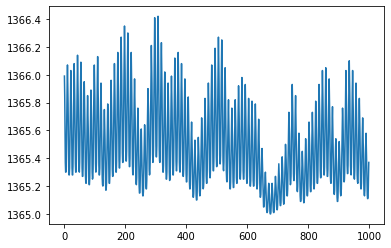

In [307]:
from scipy.signal import hilbert
plt.plot(np.abs(hilbert(SUN)))

In [302]:
corr_array_vul = np.zeros((16 * 6, 30))
corr_array_sun = corr_array_vul.copy()

for kk in range(30):
    for n, ii in enumerate(zone_array_flat.T):
        corr_array_vul[n, kk] = pearsonr(np.roll(ii, -kk), VUL)[0]
        corr_array_sun[n, kk] = pearsonr(np.roll(ii, -kk), SUN)[0]

corr_array_vul = pd.DataFrame(corr_array_vul.T, columns=labels.reshape(-1))
corr_array_sun = pd.DataFrame(corr_array_sun.T, columns=labels.reshape(-1))

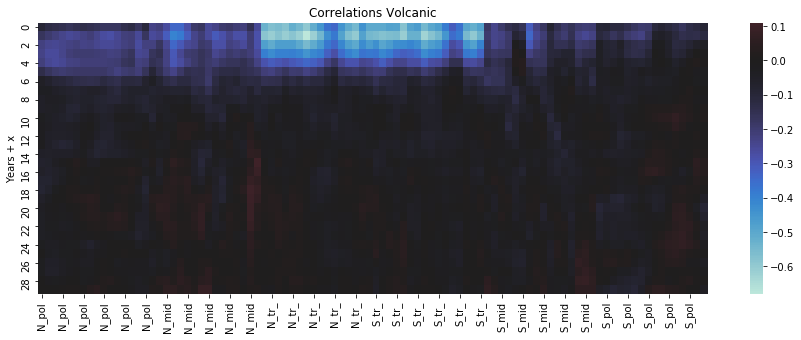

In [303]:
plt.figure(figsize=(15,5))
sns.heatmap(corr_array_vul, center=0, xticklabels=3)
plt.ylabel('Years + x')
plt.title('Correlations Volcanic')
plt.savefig('data/correlations_vul.png')

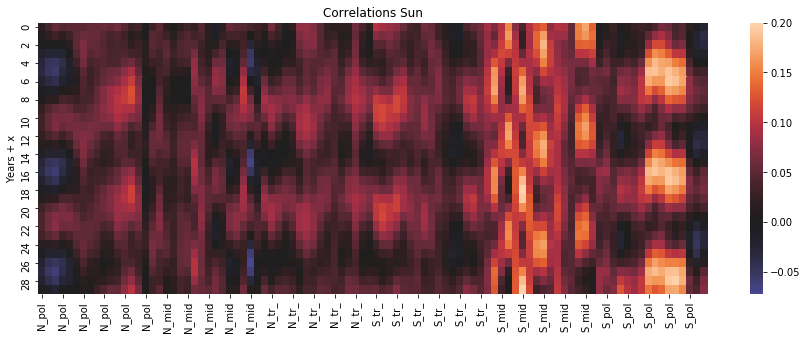

In [304]:
plt.figure(figsize=(15,5))
sns.heatmap(corr_array_sun, center=0, xticklabels=3)
plt.ylabel('Years + x')
plt.title('Correlations Sun')
plt.savefig('data/correlations_sun.png')

In [ ]:
correlation_mat = np.zeros( (lat.shape[0], lon.shape[0], 2))
for ii in range(lat.shape[0]):
    for jj in range(lon.shape[0]):
        correlation_mat[ii, jj, 0] = pearsonr(tmp[:, ii, jj], SUN)[0]
        correlation_mat[ii, jj, 1] = pearsonr(tmp[:, ii, jj], VUL)[0]
    
plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.heatmap(correlation_mat[:, :, 0], cmap='coolwarm', center=0)
plt.title('Correlation with Sun')
plt.subplot(122)
sns.heatmap(correlation_mat[:, :, 1], cmap='coolwarm', center=0)
plt.title('Correlation with Vol')
#plt.savefig('data/pearson_correlation.png')